# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('resources/demo001_clean.csv')
X = pd.read_csv('resources/demo001_x.csv')
y = pd.read_csv('resources/demo001_y.csv')

#train_df, test_df = train_test_split(df, test_size=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [4]:
y.head()

,Unnamed: 0,mau
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False


In [5]:
X.head()

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,True,...,True,True,False,False,False,True,False,False,False,False
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,True,False,False,True,False,True,False,False,False,False
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,True,False,False,True,False,True,False,False,False,False
3,3,0,46.224658,2.106849,1,1,1,1,2.0,True,...,False,True,False,False,False,True,False,False,False,False
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,False,True,False,False,False,True,False,False,False,False


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [18]:
#2.1.
# inicializando árvore
clf = DecisionTreeClassifier(random_state=42, max_depth=2)

#2.2
# Treinando modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

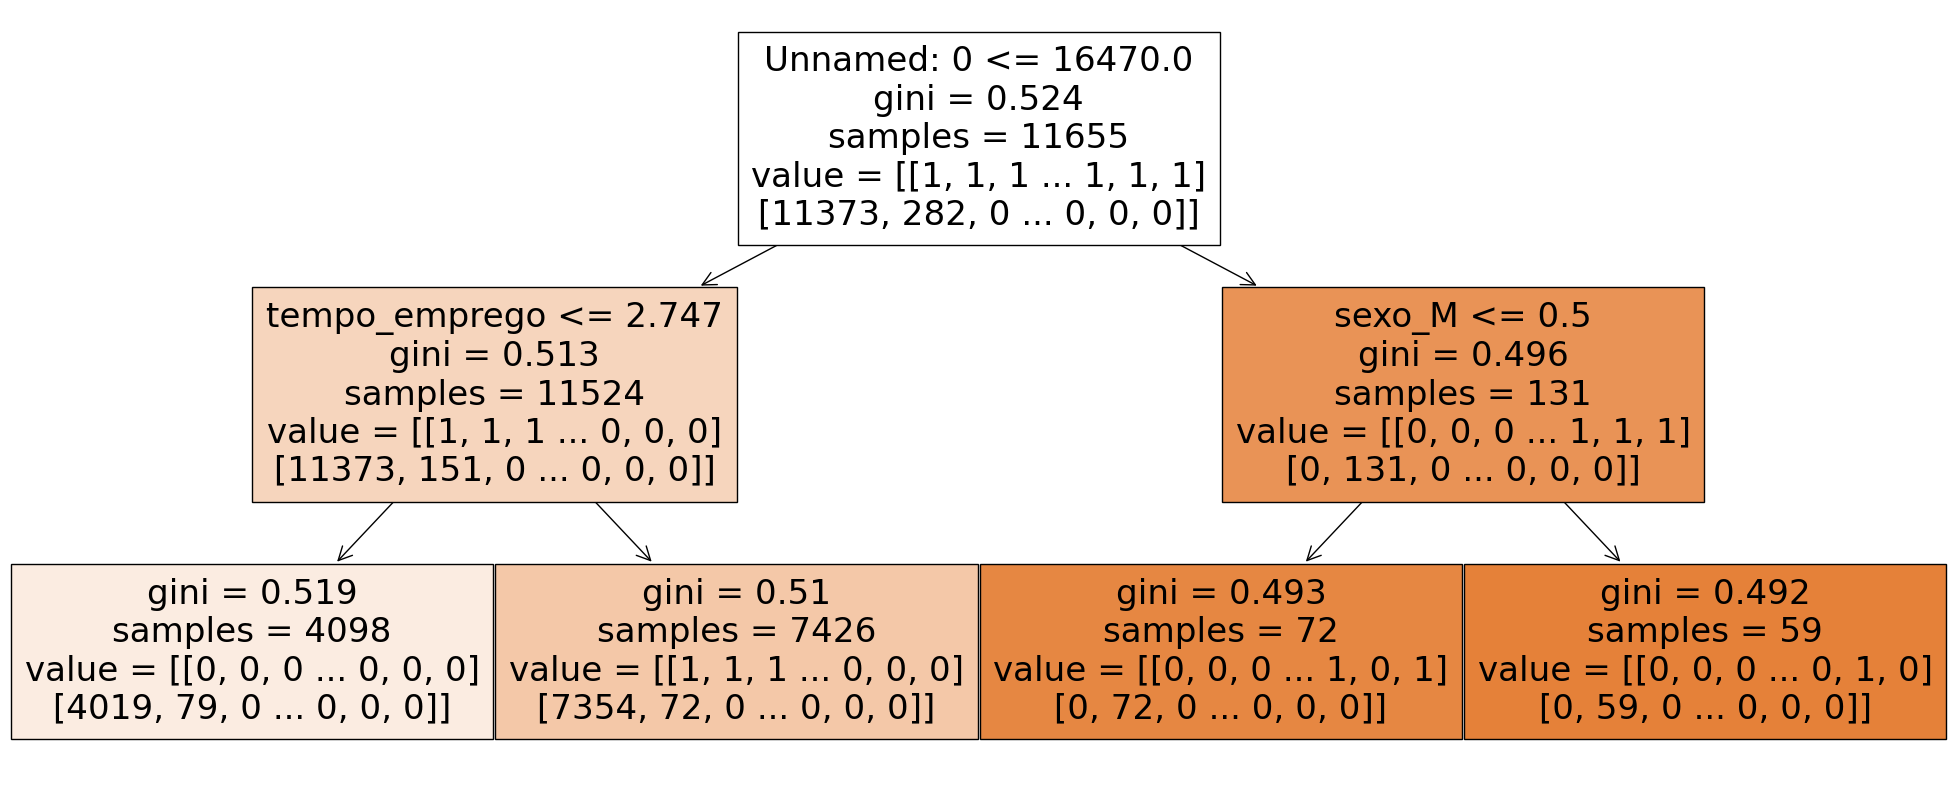

In [20]:
#2.3
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Good', 'Bad'],
          feature_names=X_train.columns.tolist());
plt.show()

In [58]:
# Check unique values in y['mau']
print(y_filtered.unique())

# Check unique values in predicted labels
print(np.unique(valid_predictions))

[False  True]
[0 1]


In [53]:
#2.4
preditos = clf.predict(X)
valid_predictions = preditos[(preditos == 0) | (preditos == 1)]
y_filtered = y['mau'][:len(valid_predictions)]
valid_predictions

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [59]:
cm = confusion_matrix(y_filtered, valid_predictions, labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])

MatrizDeConfusao.plot()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [16650, 27244]

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?